In [1]:
!nvidia-smi

Thu Dec 12 23:36:17 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install -q ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00


In [ ]:
from roboflow import Roboflow
from google.colab import userdata
from IPython.display import Image

!mkdir {HOME}/datasets
%cd {HOME}/datasets

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

project = rf.workspace("vansh-bothra-5ldgs").project("football-pitch-detection-phdzs")
version = project.version(1)
dataset = version.download("yolov8")

mkdir: cannot create directory ‘{HOME}/datasets’: No such file or directory
[Errno 2] No such file or directory: '{HOME}/datasets'
/content
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-field-detection-12 in yolov8:: 100%|██████████| 564/564 [00:00<00:00, 1625.61it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
!sed -i 's|\(train: \).*|\1../train/images|' {dataset.location}/data.yaml
!sed -i 's|\(val: \).*|\1../valid/images|' {dataset.location}/data.yaml

In [11]:
%cd {HOME}

!yolo task=pose mode=train model=yolov8x-pose.pt data={dataset.location}/data.yaml batch=16 epochs=70 imgsz=640 mosaic=0.0 plots=True

[Errno 2] No such file or directory: '{HOME}'
/content
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=pose, mode=train, model=yolov8x-pose.pt, data=/content/football-field-detection-12/data.yaml, epochs=70, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False,

[Errno 2] No such file or directory: '{HOME}'
/content


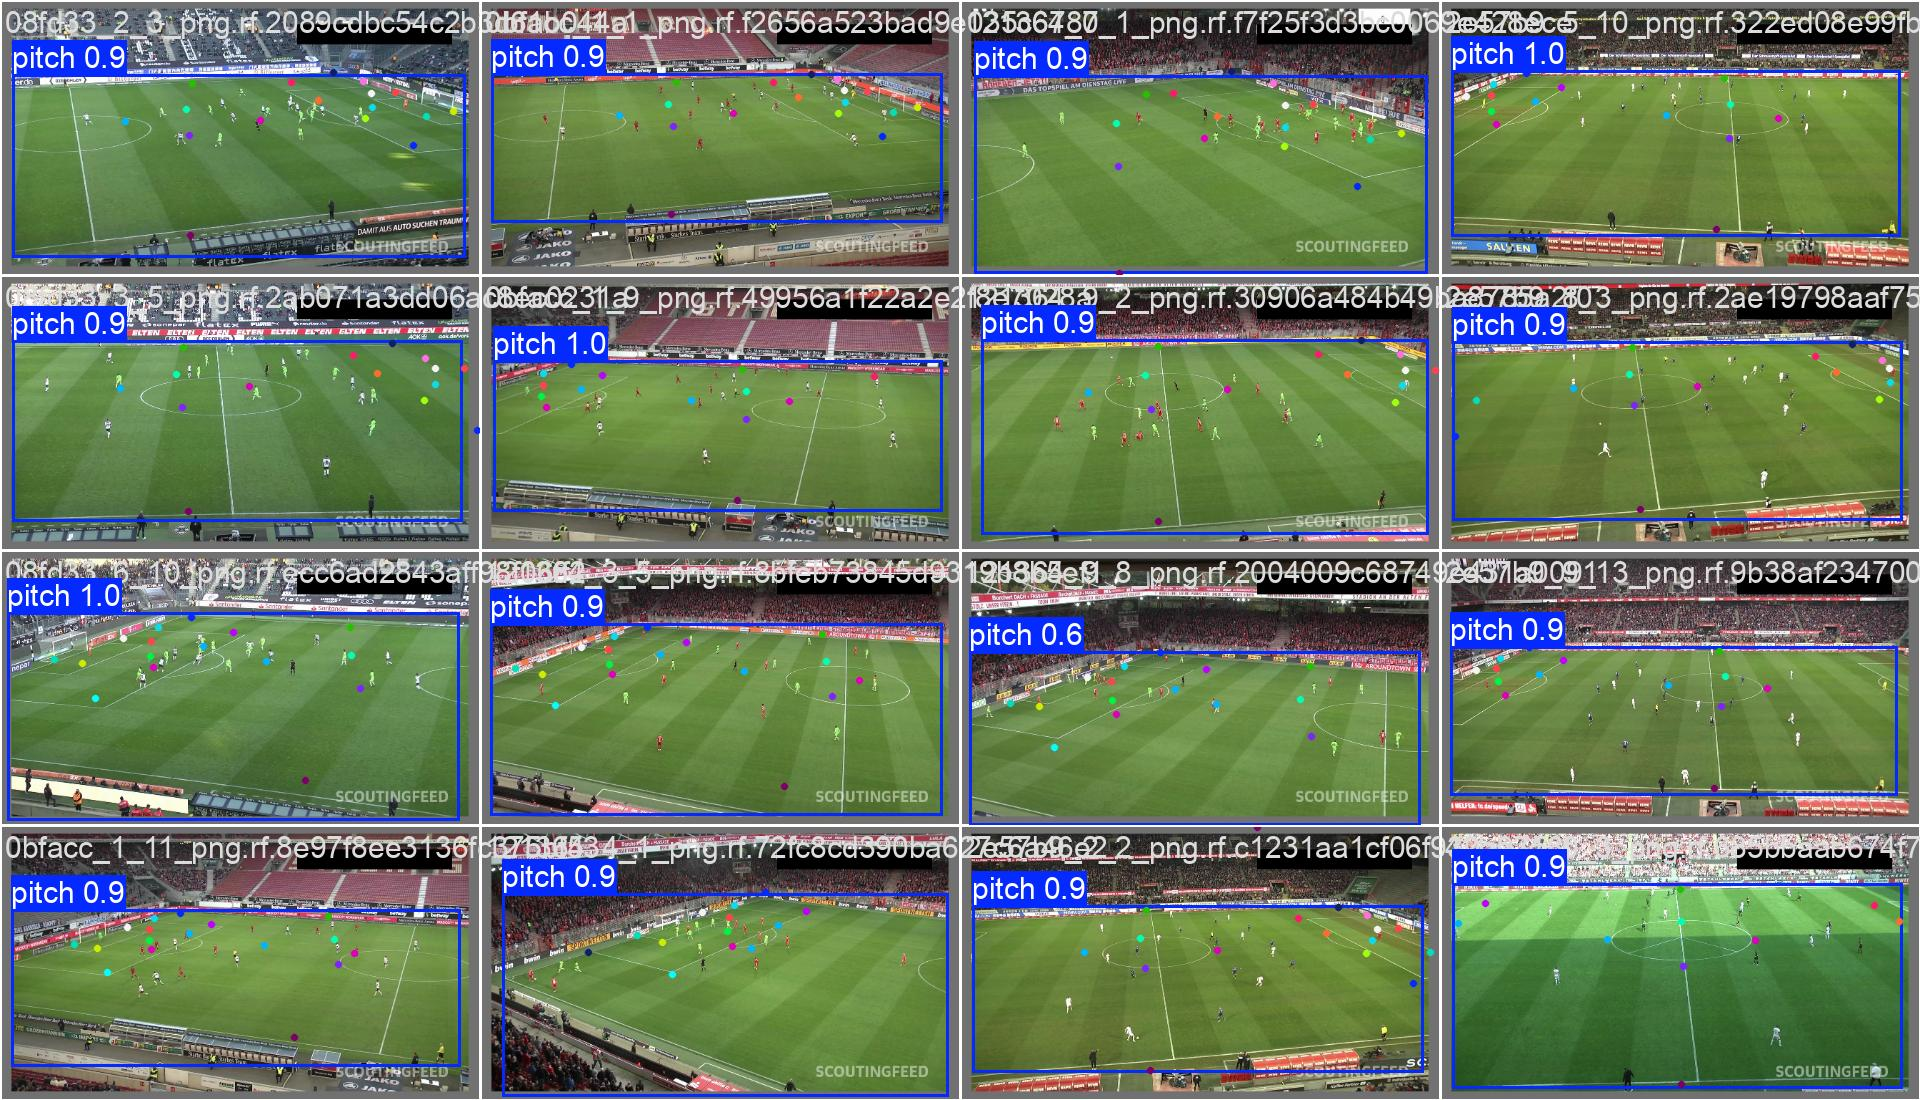

In [12]:
%cd {HOME}
Image(filename=f'/content/runs/pose/train2/val_batch0_pred.jpg', width=600)

In [13]:
!yolo task=pose mode=val model=/content/runs/pose/train2/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-pose summary (fused): 287 layers, 69,784,275 parameters, 0 gradients, 264.7 GFLOPs
val: Scanning /content/football-field-detection-12/valid/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100% 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.33s/it]
                   all         30         30      0.999          1      0.995      0.966      0.699        0.7      0.602      0.231
Speed: 0.2ms preprocess, 41.5ms inference, 0.0ms loss, 32.3ms postprocess per image
Results saved to runs/pose/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


In [16]:
!pip install ultralytics==8.0.196

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 19.1 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.3.49
    Uninstalling ultralytics-8.3.49:
      Successfully uninstalled ultralytics-8.3.49


In [2]:
from roboflow import Roboflow
from google.colab import userdata
from IPython.display import Image

In [10]:
!pip show roboflow

Name: roboflow
Version: 1.1.49
Summary: Official Python package for working with the Roboflow API
Home-page: https://github.com/roboflow-ai/roboflow-python
Author: Roboflow
Author-email: support@roboflow.com
License: UNKNOWN
Location: /usr/local/lib/python3.10/dist-packages
Requires: certifi, cycler, filetype, idna, kiwisolver, matplotlib, numpy, opencv-python-headless, Pillow, python-dateutil, python-dotenv, PyYAML, requests, requests-toolbelt, six, tqdm, urllib3
Required-by: 


In [14]:
ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

project = rf.workspace("vansh-bothra-5ldgs").project("football-pitch-detection-phdzs")

project.version(1).deploy(model_type="yolov8-pose", model_path=f"/content/runs/pose/train2/")

loading Roboflow workspace...
loading Roboflow project...


You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


View the status of your deployment at: https://app.roboflow.com/vansh-bothra-5ldgs/football-pitch-detection-phdzs/1
Share your model with the world at: https://universe.roboflow.com/vansh-bothra-5ldgs/football-pitch-detection-phdzs/model/1


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
!cp -r /content/runs/pose/train2/ /content/drive/MyDrive/